In [75]:
def allInOne(path):

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt

    def filterArraysToShortest(arr1, arr1Pos, arr2, arr2Pos):
        both_pos = np.logical_and(arr1Pos, arr2Pos)
        arr1Filt = arr1[both_pos] 
        arr2Filt = arr2[both_pos] 
    
        return arr1Filt, arr2Filt
    
    df = pd.read_csv(path)
    display(df.head(5))
    
    reps = df['rep'].to_numpy()
    hopsRanked = df['hopsRanked'].to_numpy()
    hopsUnranked = df['hopsUnranked'].to_numpy()
    hopsRankedOne = df['hopsRankedOne'].to_numpy()
    hopsPath = df['hopsPath'].to_numpy()

    hopsRankedPositive = hopsRanked > -1
    hopsUnrankedPositive = hopsUnranked > -1
    hopsRankedOnePositive = hopsRankedOne > -1
    hopsPathPositive = hopsPath > -1
    
    total = len(df.index)

    print("total:", total)
    successesRanked = np.count_nonzero(hopsRanked > -1)
    successesRankedOne = np.count_nonzero(hopsRankedOne > -1)
    successesUnranked = np.count_nonzero(hopsUnranked > -1)
    successesPath = np.count_nonzero(hopsPath > -1)

    print("Resilience Paths: {}%".format((successesPath / total) * 100))
    print("Resilience One Tree: {}%".format((successesRankedOne / total) * 100))
    print("Resilience Trees: {}%".format((successesRanked / total) * 100))
    #print("Resilience Unranked: {}%".format((successesUnranked / total) * 100))

  
    hopsPathFiltered,hopsRankedFiltered = filterArraysToShortest(hopsPath, hopsPathPositive, hopsRanked, hopsRankedPositive)   
    
    diff = np.subtract(hopsPathFiltered,hopsRankedFiltered)
    plt.scatter(np.arange(len(hopsPathFiltered)), diff, color="blue", s=1.5)
    plt.show()

    higherZero = np.count_nonzero(diff > 0)
    lowerZero = np.count_nonzero(diff < 0)
    equalZero = np.count_nonzero(diff == 0)

    print("Trees beat paths in {} runs".format(higherZero))
    print("Paths beat trees in {} runs".format(lowerZero))
    print("Both performed equally good in {} runs".format(equalZero))
    

    hopsPathFiltered,hopsRankedOneFiltered = filterArraysToShortest(hopsPath, hopsPathPositive, hopsRankedOne, hopsRankedOnePositive)   

    diff = np.subtract(hopsPathFiltered,hopsRankedOneFiltered)
    plt.scatter(np.arange(len(hopsPathFiltered)), diff, color="blue", s=1.5);
    plt.show()

    higherZero = np.count_nonzero(diff > 0)
    lowerZero = np.count_nonzero(diff < 0)
    equalZero = np.count_nonzero(diff == 0)

    print("One Tree beat paths in {} runs".format(higherZero))
    print("Paths beat one tree in {} runs".format(lowerZero))
    print("Both performed equally good in {} runs".format(equalZero))




    hopsRankedOneFiltered,hopsRankedFiltered = filterArraysToShortest(hopsRankedOne, hopsRankedOnePositive, hopsRanked, hopsRankedPositive)   

    diff = np.subtract(hopsRankedOneFiltered,hopsRankedFiltered)
    plt.scatter(np.arange(len(hopsRankedFiltered)), diff, color="blue", s=1.5);
    plt.show()

    higherZero = np.count_nonzero(diff > 0)
    lowerZero = np.count_nonzero(diff < 0)
    equalZero = np.count_nonzero(diff == 0)

    print("Multiple Trees beat One Tree in {} runs".format(higherZero))
    print("One Tree beat  multiple trees in {} runs".format(lowerZero))
    print("Both performed equally good in {} runs".format(equalZero))




    hopsUnrankedFiltered,hopsRankedFiltered = filterArraysToShortest(hopsUnranked, hopsUnrankedPositive, hopsRanked, hopsRankedPositive)   

    diff = np.subtract(hopsUnrankedFiltered,hopsRankedFiltered)
    plt.scatter(np.arange(len(hopsRankedFiltered)), diff, color="blue", s=1.5);
    plt.show()

    higherZero = np.count_nonzero(diff > 0)
    lowerZero = np.count_nonzero(diff < 0)
    equalZero = np.count_nonzero(diff == 0)

    print("Ranked Trees beat Unranked Tree in {} runs".format(higherZero))
    print("Unranked Tree beat ranked trees in {} runs".format(lowerZero))
    print("Both performed equally good in {} runs".format(equalZero))

## CLUSTERED, 70%, -30% per hop

,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch,nodeAdditions,hopsPath,hopsRankedOne,hopsUnrankedOne,overallNodeAdditionsOne
0,1000,100,250,0.05,2,1,clustered,-1,2,2,2,0,10,2,2,2,10
1,999,100,231,0.05,9,8,clustered,-1,7,7,3,4,0,7,7,7,0
2,998,100,261,0.05,3,2,clustered,-1,7,13,5,2,20,-1,-1,-1,8
3,997,100,228,0.05,3,2,clustered,-1,-1,-1,5,-6,14,-1,-1,-1,6
4,995,100,230,0.05,2,1,clustered,-1,12,12,6,6,0,-1,-1,-1,0


total: 760
Resilience Paths: 48.026315789473685%
Resilience One Tree: 58.94736842105262%
Resilience Trees: 84.47368421052632%


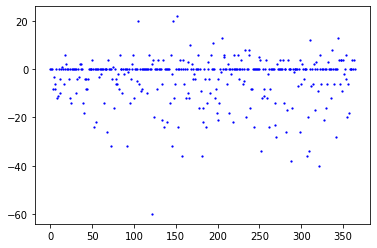

Trees beat paths in 62 runs
Paths beat trees in 141 runs
Both performed equally good in 162 runs


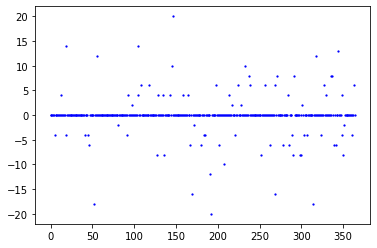

One Tree beat paths in 38 runs
Paths beat one tree in 40 runs
Both performed equally good in 287 runs


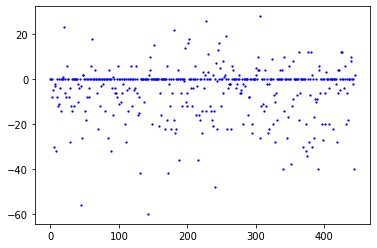

Multiple Trees beat One Tree in 69 runs
One Tree beat  multiple trees in 181 runs
Both performed equally good in 196 runs


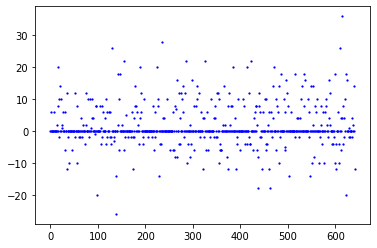

Ranked Trees beat Unranked Tree in 183 runs
Unranked Tree beat ranked trees in 128 runs
Both performed equally good in 331 runs


In [76]:
allInOne("CSVs/trees-2021-07-25_13-22-50-p0.05-n100.csv")

## CLUSTERED, 50%, -15% per hop

,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch,nodeAdditions,hopsPath,hopsRankedOne,hopsUnrankedOne,overallNodeAdditionsOne
0,999,100,245,0.05,4,3,clustered,0.5;-0.15,3,3,3,0,4,3,3,3,2
1,997,100,232,0.05,1,0,clustered,0.5;-0.15,16,8,6,10,10,-1,16,8,10
2,996,100,278,0.05,1,0,clustered,0.5;-0.15,7,7,5,2,4,-1,7,7,4
3,994,100,231,0.05,8,7,clustered,0.5;-0.15,-1,-1,5,-6,0,-1,-1,-1,0
4,993,100,256,0.05,3,2,clustered,0.5;-0.15,-1,-1,6,-7,0,-1,-1,-1,0


Resilience Paths: 36.90322580645161%
Resilience One Tree: 45.16129032258064%
Resilience Trees: 64.77419354838709%


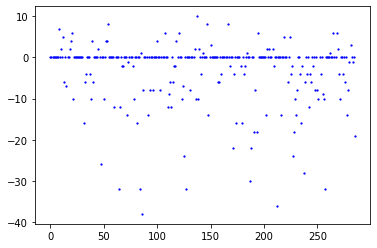

Trees beat paths in 35 runs
Paths beat trees in 98 runs
Both performed equally good in 153 runs


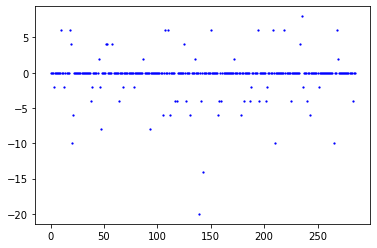

One Tree beat paths in 21 runs
Paths beat one tree in 39 runs
Both performed equally good in 226 runs


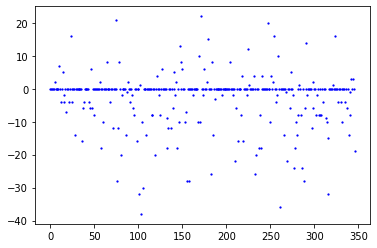

Multiple Trees beat One Tree in 43 runs
One Tree beat  multiple trees in 111 runs
Both performed equally good in 193 runs


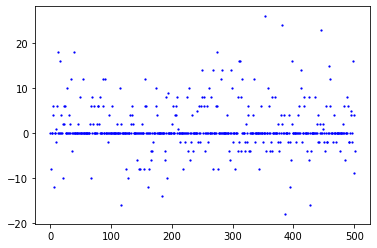

Ranked Trees beat Unranked Tree in 131 runs
Unranked Tree beat ranked trees in 85 runs
Both performed equally good in 286 runs


In [71]:
allInOne('CSVs/trees-2021-07-25_14-24-23-p0.05-n100.csv')


## Adversarial failures around D (varying failure rate)

,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch,nodeAdditions,hopsPath,hopsRankedOne,hopsUnrankedOne,overallNodeAdditionsOne
0,1000,100,234,0.05,7,6,adversarial,0.35,7,7,3,4,4,7,7,7,2
1,999,100,250,0.05,3,2,adversarial,0.67,20,26,4,16,0,15,15,15,0
2,998,100,250,0.05,4,3,adversarial,0.84,15,15,3,12,0,12,12,12,0
3,997,100,267,0.05,7,6,adversarial,0.76,9,9,3,6,10,9,9,9,4
4,996,100,263,0.05,9,8,adversarial,0.69,12,12,4,8,4,12,12,12,2


Resilience Paths: 94.28857715430861%
Resilience One Tree: 100.0%
Resilience Trees: 100.0%


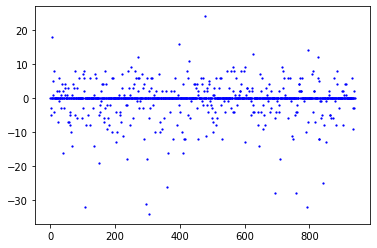

Trees beat paths in 162 runs
Paths beat trees in 166 runs
Both performed equally good in 613 runs


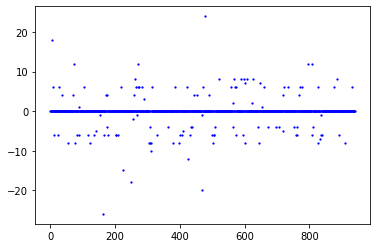

One Tree beat paths in 54 runs
Paths beat one tree in 68 runs
Both performed equally good in 819 runs


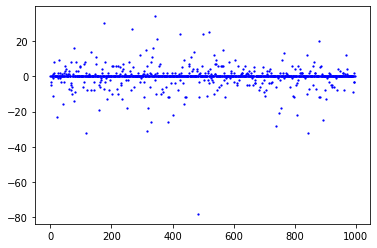

Multiple Trees beat One Tree in 172 runs
One Tree beat  multiple trees in 152 runs
Both performed equally good in 674 runs


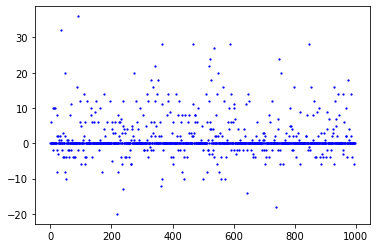

Ranked Trees beat Unranked Tree in 234 runs
Unranked Tree beat ranked trees in 120 runs
Both performed equally good in 644 runs


In [72]:
allInOne('CSVs/trees-2021-07-24_19-48-33-p0.05-n100.csv')

## Fixed adversarial failure rate 80%

,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne
0,1000,100,248,0.05,3,2,adversarial,0.8,15,15,4,11,0,10,6,4,4,0,0
1,999,100,262,0.05,4,3,adversarial,0.8,29,29,5,24,0,23,18,23,23,18,0
2,998,100,248,0.05,6,5,adversarial,0.8,5,20,3,2,0,5,2,9,9,6,0
3,997,100,240,0.05,4,3,adversarial,0.8,12,16,4,8,0,14,10,20,20,16,0
4,996,100,243,0.05,3,2,adversarial,0.8,8,8,4,4,26,8,4,8,8,4,12


Resilience Paths: 88.64321608040201%
Resilience One Tree: 100.0%
Resilience Trees: 100.0%


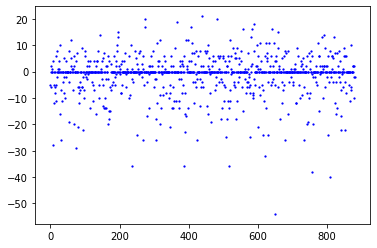

Trees beat paths in 243 runs
Paths beat trees in 262 runs
Both performed equally good in 377 runs


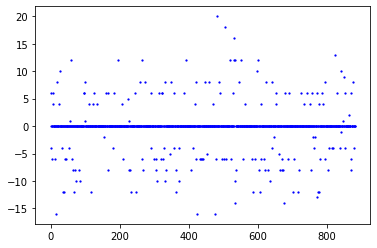

One Tree beat paths in 81 runs
Paths beat one tree in 105 runs
Both performed equally good in 696 runs


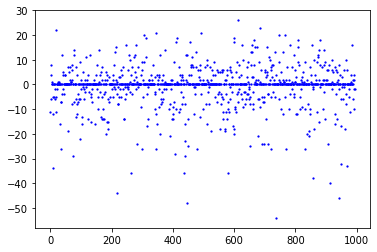

Multiple Trees beat One Tree in 281 runs
One Tree beat  multiple trees in 284 runs
Both performed equally good in 430 runs


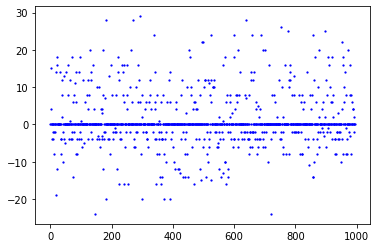

Ranked Trees beat Unranked Tree in 223 runs
Unranked Tree beat ranked trees in 249 runs
Both performed equally good in 523 runs


In [73]:
allInOne('CSVs/trees-2021-07-25_14-37-35-p0.05-n100.csv')


## (TODO: Schlecht angebundenes S?)

,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,100,240,0.05,7,6,clustered,0.5;-0.15,27,42,5,22,0,23,18,23,23,18,0,shortest
1,999,100,254,0.05,2,1,clustered,0.5;-0.15,-1,-1,5,-6,26,-1,-6,-1,-1,-6,0,shortest
2,998,100,226,0.05,4,3,clustered,0.5;-0.15,19,19,5,14,8,-1,-6,-1,-1,-6,0,shortest
3,995,100,253,0.05,1,0,clustered,0.5;-0.15,-1,-1,8,-9,4,-1,-9,-1,-1,-9,4,shortest
4,993,100,251,0.05,3,2,clustered,0.5;-0.15,-1,-1,7,-8,6,-1,-8,-1,-1,-8,0,shortest


Resilience Paths: 39.41411451398136%
Resilience One Tree: 40.612516644474034%
Resilience Trees: 65.24633821571238%


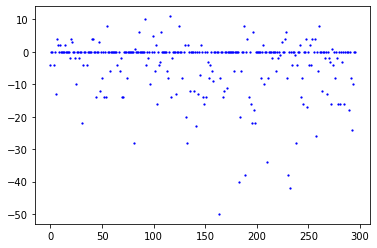

Trees beat paths in 35 runs
Paths beat trees in 106 runs
Both performed equally good in 155 runs


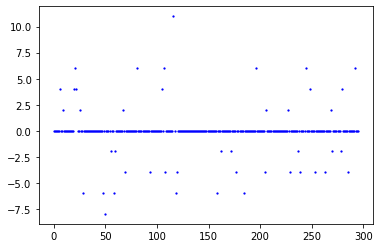

One Tree beat paths in 19 runs
Paths beat one tree in 25 runs
Both performed equally good in 252 runs


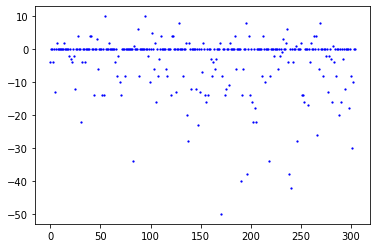

Multiple Trees beat One Tree in 36 runs
One Tree beat  multiple trees in 100 runs
Both performed equally good in 169 runs


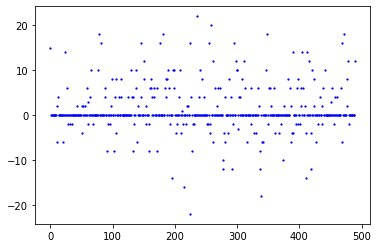

Ranked Trees beat Unranked Tree in 127 runs
Unranked Tree beat ranked trees in 75 runs
Both performed equally good in 288 runs


In [74]:
allInOne('CSVs/trees-2021-08-01_19-33-45-p0.05-n100.csv')
